 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns

whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")

whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls

whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls

whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns



In [10]:
# Count nulls
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [13]:
# Check Data Types
sp500_history_df.dtypes


Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype



,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [16]:
# Calculate Daily Returns

daily_returns_sp500 = sp500_history_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [17]:
# Drop nulls
daily_returns_sp500 = daily_returns_sp500.dropna()
daily_returns_sp500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename(columns = {"Close": "S&P500"}, inplace=True)
sp500_history_df.head()


,S&P500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
column_appended_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
column_appended_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

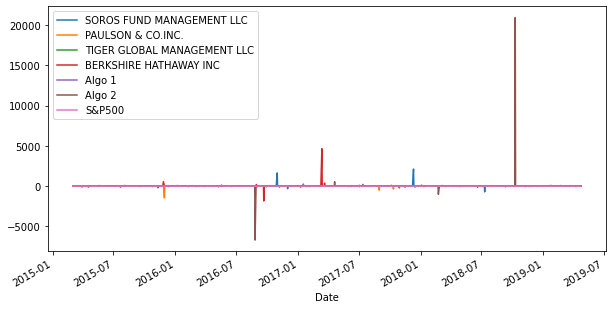

In [22]:
# Plot daily returns of all portfolios
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
combined_daily_returns = combined_df.pct_change()
combined_daily_returns.plot(figsize=(10, 5))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

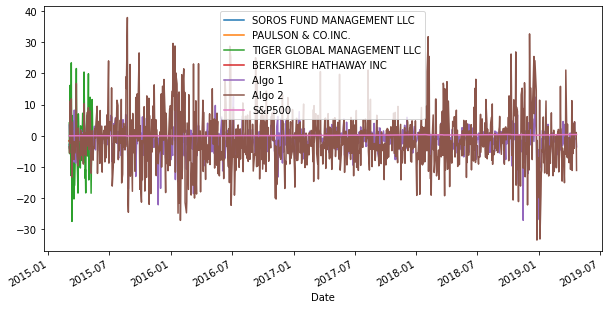

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1
cumulative_returns.plot(figsize=(10,5))
# Plot cumulative returns



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

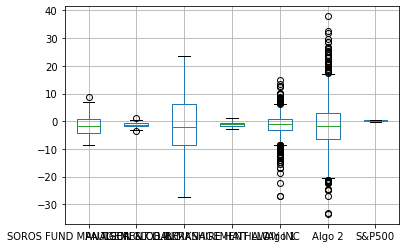

In [27]:
# Box plot to visually show risk
cumulative_returns.boxplot()


### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = cumulative_returns.std()

### Determine which portfolios are riskier than the S&P 500

In [30]:
# Calculate  the daily standard deviation of S&P 500
daily_returns_sp500 = sp500_history_df.pct_change()
sp500_std = daily_returns_sp500.std()
# Determine which portfolios are riskier than the S&P 500
combined_df.rolling(window=21).std().dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,21.011611
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,20.233870
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,19.633860
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,18.734424
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,18.737542
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,37.532613
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,38.079125
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,38.149890


### Calculate the Annualized Standard Deviation

In [31]:
# Calculate the annualized standard deviation (252 trading days)
all_portfolio_std_annual = all_portfolio_std.std() * np.sqrt(252)
sp500_std_annual = sp500_std.std() * np.sqrt(252)

all_portfolio_std_annual

69.23059671387105

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

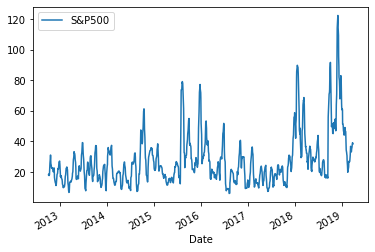

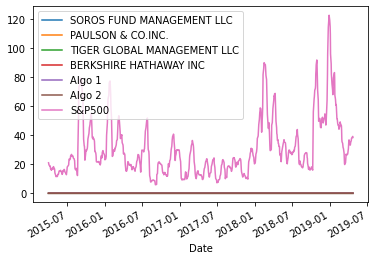

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().dropna()

# Plot the rolling standard deviation
sp500_history_df.rolling(window=21).std().dropna().plot()
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:xlabel='Date'>

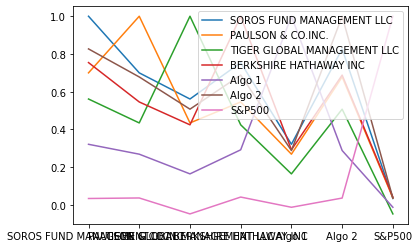

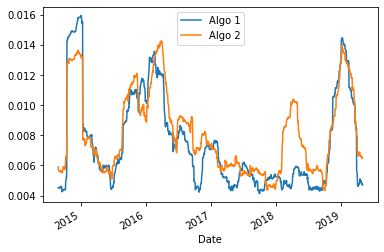

In [36]:
# Calculate the correlation
price_correlation = combined_df.corr()

# Display de correlation matrix
price_correlation = combined_df.corr().plot()
algo_returns_df.rolling(window=60).std().dropna().plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of buffet daaddy Returns vs. S&P 500 Returns'}, xlabel='Date'>

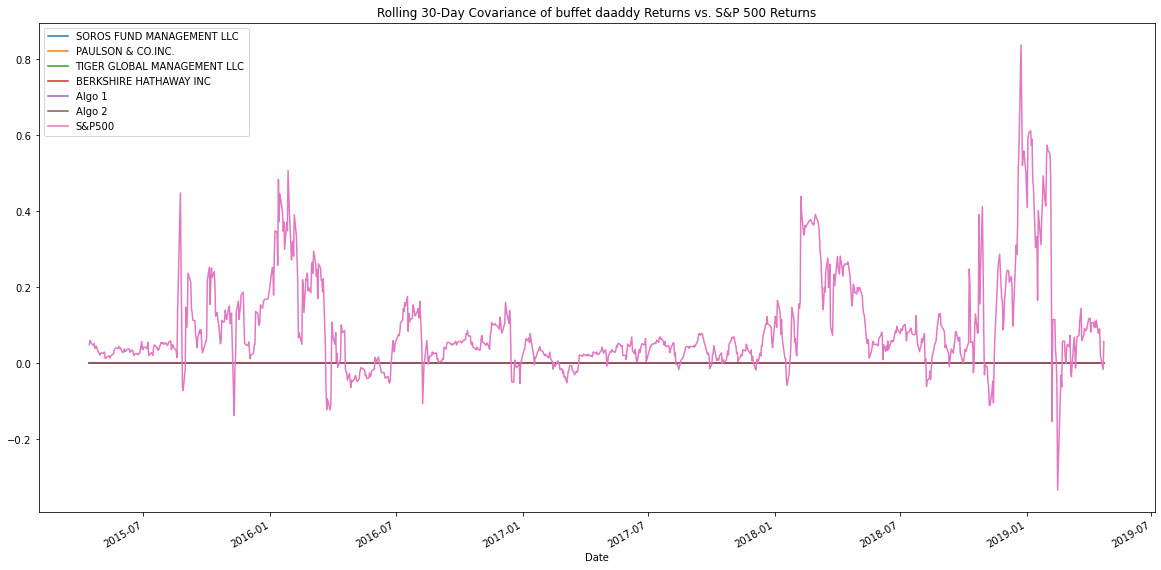

In [44]:
# Calculate covariance of a single portfolio
berkshire_covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df['S&P500'])

# Calculate variance of S&P 500
variance = combined_df['S&P500'].var()

# Computing beta
berkshire_beta = berkshire_covariance / variance

# Plot beta trend
rolling_berkshire_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=30).cov(combined_df)

rolling_berkshire_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of buffet daaddy Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Annualized Sharpe Ratios
Annualized_Sharpe_Ratios = (combined_daily_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
Annualized_Sharpe_Ratios.head()

SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
Algo 1                        -2.983502
dtype: float64

In [41]:
# Visualize the sharpe ratios as a bar plot
ax = rolling_soros.plot(figsize=(20, 10)
rolling_berkshire_sharpe_ratios.plot(ax=ax)
rolling_algo1_sharpe_ratios.plot(ax=ax)
rolling_algo2_sharpe_ratios.plot(ax=ax)

ax.legend(["SOROS FUND MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC.", "Algo 1", "Algo 2"])

SyntaxError: invalid syntax (<ipython-input-41-7304afea9f68>, line 3)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!